# Linear regression

### Let's define the function!

\\( y = 5x + 3 \\)

In [35]:
%matplotlib inline

import keras
import numpy as np

x = np.linspace(0,80,81)
noise = np.random.normal(0,20,81)
y = 3 + 5*x + noise

---------------------------------------------------------------------------------

### Define the single-neuron network without non-linerity

In [55]:
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(1,))
preds = Dense(1,activation='relu')(inputs)
model = Model(inputs=inputs,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


---------------------------------------------------------------------------------

### Train for 300 epochs

In [56]:
sgd = keras.optimizers.SGD(lr=0.0000001)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam ,loss='mse')
model.fit(x,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
81/81 [==============================] - 0s 4ms/step - loss: 51770.5509
Epoch 2/300
81/81 [==============================] - 0s 2ms/step - loss: 50189.1300
Epoch 3/300
81/81 [==============================] - 0s 2ms/step - loss: 48848.9164
Epoch 4/300
81/81 [==============================] - 0s 2ms/step - loss: 47570.0581
Epoch 5/300
81/81 [==============================] - 0s 2ms/step - loss: 46331.7957
Epoch 6/300
81/81 [==============================] - 0s 2ms/step - loss: 45126.2865
Epoch 7/300
81/81 [==============================] - 0s 2ms/step - loss: 43949.5249
Epoch 8/300
81/81 [==============================] - 0s 2ms/step - loss: 42799.0987
Epoch 9/300
81/81 [==============================] - 0s 2ms/step - loss: 41673.3630
Epoch 10/300
81/81 [==============================] - 0s 2ms/step - loss: 40571.1235
Epoch 11/300
81/81 [==============================] - 0s 2ms/step - loss: 39491.4448
Epoch 12/300
81/81 [==============================] - 0s 2ms/step - loss: 

81/81 [==============================] - 0s 2ms/step - loss: 694.1445
Epoch 99/300
81/81 [==============================] - 0s 2ms/step - loss: 657.3519
Epoch 100/300
81/81 [==============================] - 0s 2ms/step - loss: 624.1614
Epoch 101/300
81/81 [==============================] - 0s 2ms/step - loss: 594.3387
Epoch 102/300
81/81 [==============================] - 0s 2ms/step - loss: 567.6504
Epoch 103/300
81/81 [==============================] - 0s 2ms/step - loss: 543.8700
Epoch 104/300
81/81 [==============================] - 0s 2ms/step - loss: 522.7743
Epoch 105/300
81/81 [==============================] - 0s 2ms/step - loss: 504.1436
Epoch 106/300
81/81 [==============================] - 0s 2ms/step - loss: 487.7715
Epoch 107/300
81/81 [==============================] - 0s 2ms/step - loss: 473.4521
Epoch 108/300
81/81 [==============================] - 0s 2ms/step - loss: 460.9963
Epoch 109/300
81/81 [==============================] - 0s 2ms/step - loss: 450.2177
Epoch 1

81/81 [==============================] - 0s 2ms/step - loss: 394.5411
Epoch 196/300
81/81 [==============================] - 0s 2ms/step - loss: 394.5367
Epoch 197/300
81/81 [==============================] - 0s 2ms/step - loss: 394.5321
Epoch 198/300
81/81 [==============================] - 0s 2ms/step - loss: 394.5276
Epoch 199/300
81/81 [==============================] - 0s 2ms/step - loss: 394.5229
Epoch 200/300
81/81 [==============================] - 0s 2ms/step - loss: 394.5184
Epoch 201/300
81/81 [==============================] - 0s 2ms/step - loss: 394.5139
Epoch 202/300
81/81 [==============================] - 0s 2ms/step - loss: 394.5093
Epoch 203/300
81/81 [==============================] - 0s 2ms/step - loss: 394.5047
Epoch 204/300
81/81 [==============================] - 0s 2ms/step - loss: 394.5002
Epoch 205/300
81/81 [==============================] - 0s 2ms/step - loss: 394.4956
Epoch 206/300
81/81 [==============================] - 0s 2ms/step - loss: 394.4912
Epoch 

81/81 [==============================] - 0s 2ms/step - loss: 394.1314
Epoch 293/300
81/81 [==============================] - 0s 2ms/step - loss: 394.1278
Epoch 294/300
81/81 [==============================] - 0s 2ms/step - loss: 394.1239
Epoch 295/300
81/81 [==============================] - 0s 2ms/step - loss: 394.1201
Epoch 296/300
81/81 [==============================] - 0s 2ms/step - loss: 394.1164
Epoch 297/300
81/81 [==============================] - 0s 2ms/step - loss: 394.1125
Epoch 298/300
81/81 [==============================] - 0s 2ms/step - loss: 394.1087
Epoch 299/300
81/81 [==============================] - 0s 2ms/step - loss: 394.1050
Epoch 300/300
81/81 [==============================] - 0s 2ms/step - loss: 394.1011


---------------------------------------------------------------------------------

### Print trained weight and bias

In [63]:
weight, bias = model.layers[1].get_weights()
print("Scalar: ", weight[0,0])
print("Bias  : ", bias[0])

Scalar:  4.962649
Bias  :  4.9660735


-----------------------------------------------------------------------------------------------------------------------------

### Plot original and predicted line

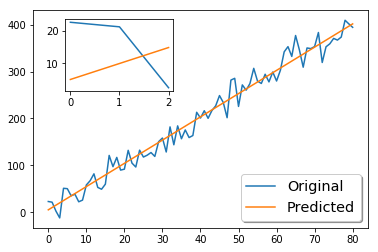

In [65]:
predictions = model.predict(x)

import matplotlib.pyplot as plt
plt.plot(x, y, label='Original')
plt.plot(x, predictions, label='Predicted')
legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')

sub_axes = plt.axes([.2, .6, .25, .25])
sub_axes.plot(x[0:3], y[0:3])
sub_axes.plot(x[0:3], predictions[0:3])

plt.show()